In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

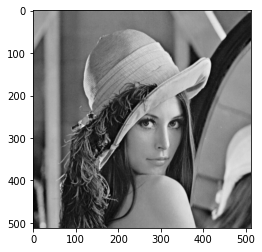

In [2]:
img= cv2.imread('Lenna.png',0)
height,width=img.shape
# fig=plt.figure(figsize=(15,15))
# ax=fig.add_subplot(111)
plt.imshow(img,'gray')

In [3]:
lenna=cv2.copyMakeBorder(img,2,2,2,2,cv2.BORDER_CONSTANT,value=0)
arr=np.asarray(lenna)

In [7]:
kernel=np.array([[1,4,6,4,1],
                [4,16,24,16,4],
                [6,24,36,24,6],
                [4,16,24,16,4],
                [1,4,6,4,1]])

sobel_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

blur=np.zeros(img.shape,dtype='uint8')
sobel=np.zeros(img.shape)

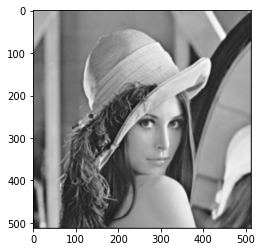

In [10]:
for i in range(height):
    for j in range(width):
        blur[i,j]=int(np.sum(arr[i:i+5 , j:j+5]*kernel)/np.sum(kernel))
plt.imshow(blur,'gray')

In [13]:
sb_i=cv2.copyMakeBorder(blur,1,1,1,1,cv2.BORDER_CONSTANT,value=0)
sx=np.zeros(img.shape)
sy=np.zeros(img.shape)

for i in range(height):
    for j in range(width):
        sx[i,j]=np.sum(sb_i[i:i+3, j:j+3]*sobel_x)
        sy[i,j]=np.sum(sb_i[i:i+3, j:j+3]*sobel_y)
        
        sobel[i,j]=round(math.sqrt(sy[i,j]*sy[i,j] + sx[i,j]*sx[i,j]))

for i in range(height):
    for j in range(width):
        sobel[i,j]=sobel[i,j] / sobel.max() *255

theta = np.arctan2(sy, sx)


In [17]:
theta=theta.round()
sobel=sobel.round()
print(theta)
print(sobel)

[[-1. -1. -2. ... -2. -2. -2.]
 [-0. -1. -1. ... -2. -2. -3.]
 [-0. -0. -1. ... -3. -3. -3.]
 ...
 [ 0.  0.  0. ...  3.  3.  3.]
 [ 0.  1.  1. ...  2.  2.  3.]
 [ 1.  1.  1. ...  2.  2.  2.]]
[[159. 178. 192. ... 198. 177. 152.]
 [183.  84.  67. ...  72.  95. 173.]
 [198.  66.  17. ...  33.  84. 186.]
 ...
 [ 66.  27.  10. ...   6.  44. 134.]
 [ 61.  32.  24. ...  41.  54. 126.]
 [ 54.  62.  70. ... 255. 255. 255.]]


In [18]:
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur,cmap = 'gray')
plt.title('Blur Image'), plt.xticks([]), plt.yticks([])
plt.subplot(123),plt.imshow(sx,cmap = 'gray')
plt.title('X Axis'), plt.xticks([]), plt.yticks([])
plt.subplot(124),plt.imshow(sy,cmap = 'gray')
plt.title('Y axis'), plt.xticks([]), plt.yticks([])
# plt.subplot(125),plt.imshow(sobel,cmap = 'gray')
# plt.title('Gradient'), plt.xticks([]), plt.yticks([])
# plt.subplot(126),plt.imshow(theta,cmap = 'gray')
# plt.title('Theta'), plt.xticks([]), plt.yticks([])

ValueError: num must be 1 <= num <= 2, not 3